In [5]:
import pandas as pd
import numpy as np
import shap
print("SHAP version:", shap.__version__)

import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


SHAP version: 0.50.0


In [2]:
fraud = pd.read_csv("../data/processed/fraud_processed.csv")

X = fraud.drop(columns=["class"])
y = fraud["class"]

print("Feature shape:", X.shape)
print("Class distribution:")
print(y.value_counts())


Feature shape: (151112, 4)
Class distribution:
class
0    136961
1     14151
Name: count, dtype: int64


In [3]:
rf_model = joblib.load("../models/rf_fraud_final.pkl")
print("✅ Random Forest model loaded successfully")


✅ Random Forest model loaded successfully


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (120889, 4)
Test shape: (30223, 4)


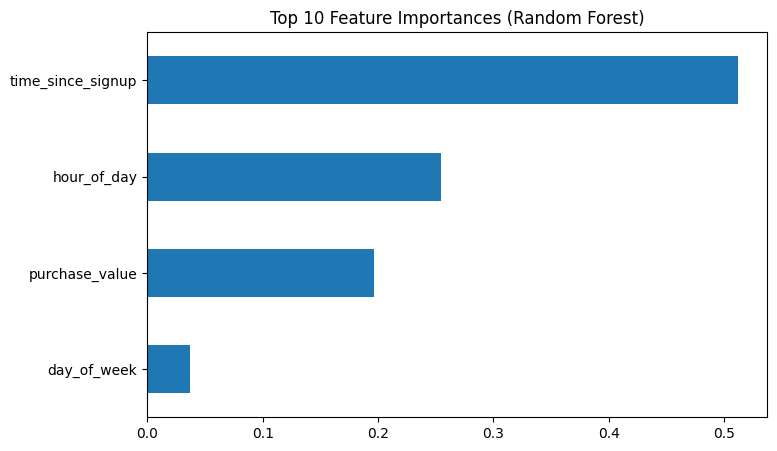

In [5]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind="barh", figsize=(8, 5))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [3]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

print("✅ SHAP explainer created")


NameError: name 'shap' is not defined